### Centrality Analysis

In [14]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.colors as mcolors
from tqdm import tqdm

In [9]:
# Load the edge data
edge_file = "edge_data.txt"
edges = pd.read_csv(edge_file, sep=" ", header=None, names=["id", "source", "target", "weight"])

In [10]:
# Create a graph
G = nx.Graph()

In [15]:
# Add edges to the graph
for _, row in tqdm(edges.iterrows()):
    G.add_edge(row["source"], row["target"], weight=row["weight"])

21693it [00:00, 71957.91it/s]


### Degree centrality analysis - Nodes with Most connections

In [32]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)

# Get node positions (if available)
node_positions_file = "node_location.txt"
node_positions = pd.read_csv(node_positions_file, sep=" ", header=None, names=["node", "longitude", "latitude"])

# Create a dictionary of positions for NetworkX
pos = {row["node"]: (row["longitude"], row["latitude"]) for _, row in node_positions.iterrows()}

# Normalize betweenness centrality values for visualization
node_size = [5000 * degree_centrality[n] if n in degree_centrality else 10 for n in G.nodes()]

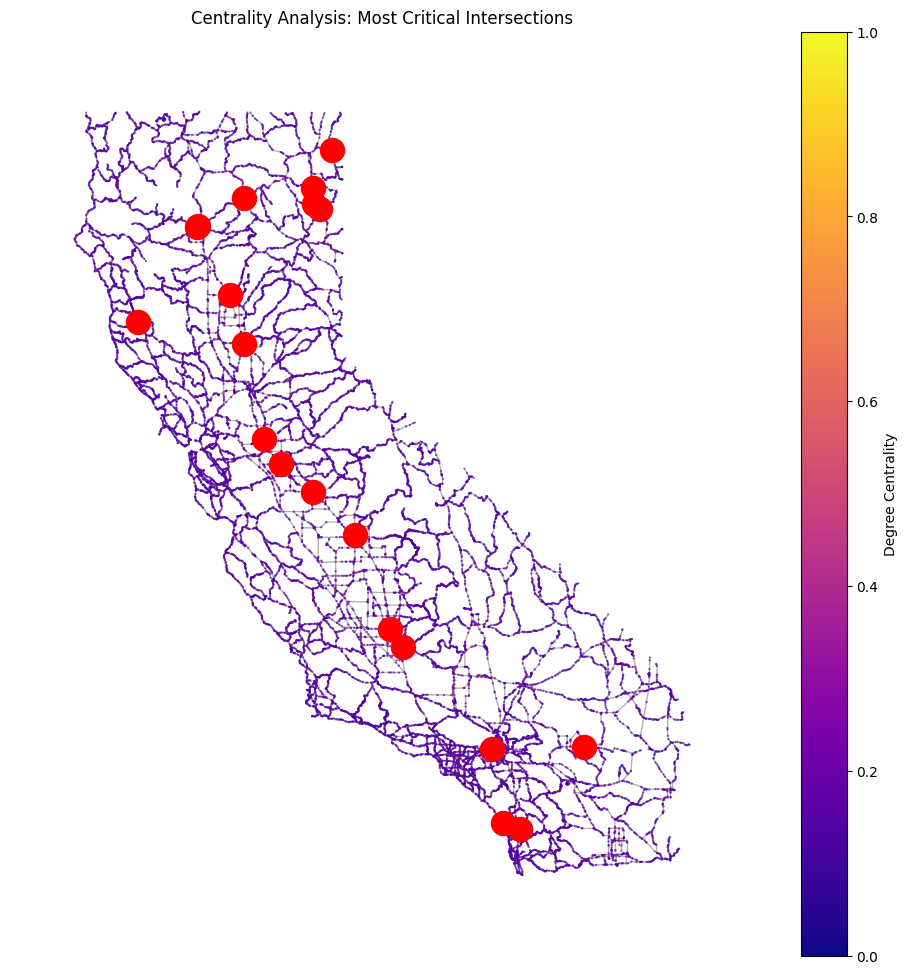

In [33]:
# Draw the graph
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(
    G, pos, node_size=node_size, with_labels=False, edge_color="gray", alpha=0.6, 
    node_color=list(degree_centrality.values()), cmap=plt.cm.plasma
)

# Highlight the top 10 most critical intersections
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:20]
nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_color="red", node_size=300)

plt.title("Centrality Analysis: Most Critical Intersections")
fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), ax=ax, label="Degree Centrality")
plt.show()

### Community Detection - Louvain Community Detection

/var/folders/6d/ltzrn7zj535gpgr2_9hj9qn40000gn/T/ipykernel_73810/2420451779.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("tab10", len(unique_communities))


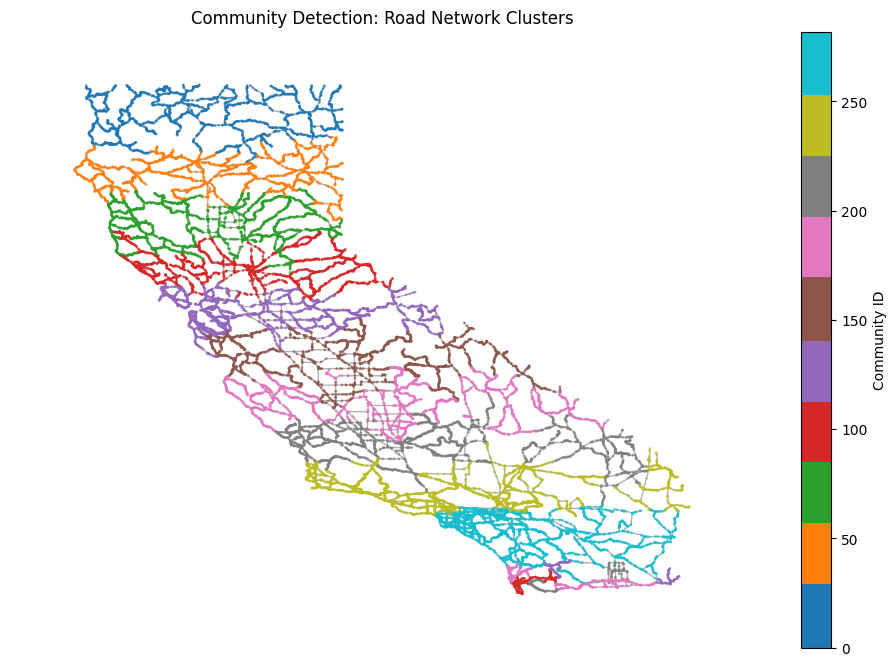

In [34]:
import community as community_louvain

# Apply Louvain Community Detection
partition = community_louvain.best_partition(G, weight='weight')

# Convert the partition dictionary to a dataframe for visualization
partition_df = pd.DataFrame(list(partition.items()), columns=["node", "community"])


# Assign each node a community color
unique_communities = sorted(set(partition.values()))  # Ensure order consistency
color_map = cm.get_cmap("tab10", len(unique_communities))

# Create a mapping from community ID to color
community_norm = mcolors.Normalize(vmin=min(unique_communities), vmax=max(unique_communities))
node_colors = [color_map(community_norm(partition[n])) if n in partition else (0, 0, 0, 1) for n in G.nodes()]

# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Draw the network graph
nx.draw(G, pos, node_color=node_colors, with_labels=False, edge_color="gray", alpha=0.6, node_size=1, ax=ax)

# Add colorbar with explicit axes
sm = cm.ScalarMappable(cmap=color_map, norm=community_norm)
cbar = fig.colorbar(sm, ax=ax, label="Community ID")

plt.title("Community Detection: Road Network Clusters")
plt.show()